# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [30]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]
    
import tensorflow as tf; print(tf.__version__)    

1.3.0


Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [31]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

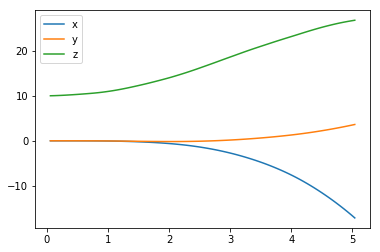

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

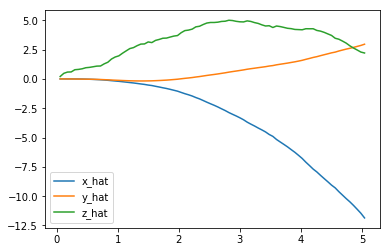

In [33]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

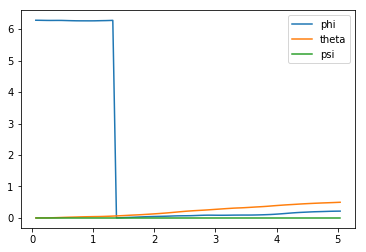

In [34]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

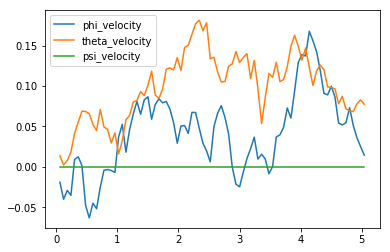

In [35]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

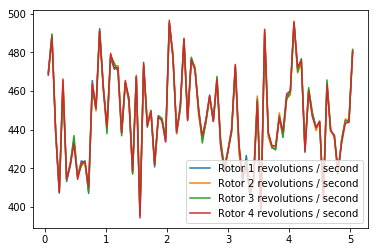

In [36]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [37]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-17.14556696   3.62246403  26.79283047   0.21580419   0.49731789   0.        ]
[-11.85521434   2.95876418   2.21010098]
[ 0.01458652  0.07752072  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [38]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -1.928 (best =   0.066), noise_scale = 3.2555

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [16]:
## TODO: Train your agent here.
import sys
import csv
import numpy as np
import pandas as pd
from agents.agent import DDPG
from task import Takeoff#, Hover, Land

init_pose  = np.array([0.,  0.,  30., 0., 0., 0.])
target_pos = np.array([0.,  0., 300.])
task = Takeoff(init_pose=init_pose, target_pos=target_pos)
agent = DDPG(task, number_of_layers=3,
             hidden_layer_size=32, dropout=0.5,
             batch_normalization=True, leaky_relu=False,
             buffer_size=100000, batch_size = 64,
             exploration_mu=0., exploration_theta=0.15, exploration_sigma=0.2,
             gamma=0.99, tau=0.01)


In [17]:
#agent.load_weights()

In [18]:
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 
           'x_velocity', 'y_velocity', 'z_velocity', 
           'phi_velocity', 'theta_velocity', 'psi_velocity', 
           'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4', 
           'reward', 'episode']
labels_per_episode = ['episode', 'mean_reward']
all_step_results = []
all_episode_step_result = []

results = {x : [] for x in labels}
episode_results = {x: [] for x in labels_per_episode}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


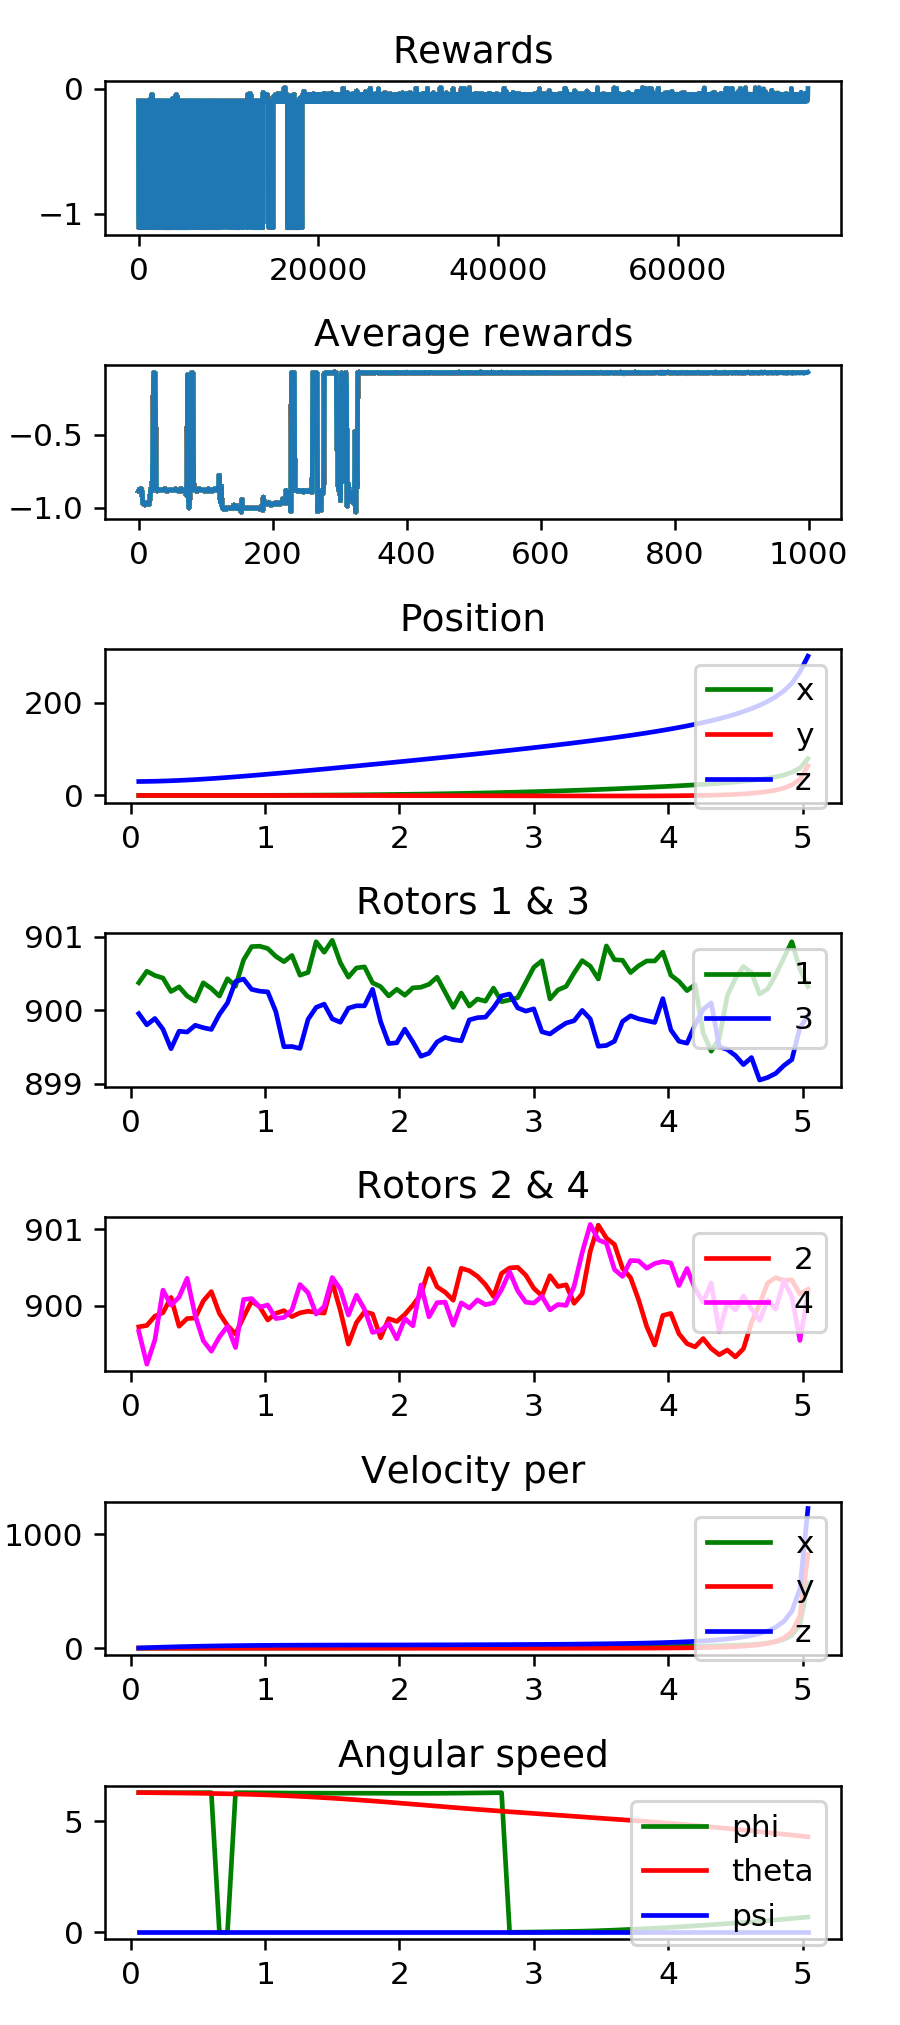

Episode=1000, reward= -5.841 steps=84 rot=[ 900.  900.  900.  900.] pos=[  79.   64.  300.]

In [19]:
%load_ext autoreload
%autoreload 2

from monitor import Monitor


import matplotlib.pyplot as plt
%matplotlib notebook

monitor = Monitor(labels, labels_per_episode)
plt.rcParams['figure.dpi'] = 150
display_freq=5


start_episode = 1
num_episode = 1000

for i_episode in range(start_episode, num_episode + 1):
    state = agent.reset_episode()
    episode_rewards = []
    per_episode = {x : [] for x in labels}
    episode_steps = 0
    while True:
        rotor_speeds = agent.act(state)
        next_state, reward, done = task.step(rotor_speeds)
        agent.step(rotor_speeds, reward, next_state, done)

        step_results = [task.sim.time] + list(task.sim.pose)  \
                       + list(task.sim.v) + list(task.sim.angular_v) \
                       + list(rotor_speeds)
        step_results.append(reward)
        step_results.append(i_episode)
        for ii in range(len(labels)):
            results[labels[ii]].append(step_results[ii])
            per_episode[labels[ii]].append(step_results[ii])
        all_step_results.append(step_results)
        episode_rewards.append(reward)

        state = next_state
        episode_steps += 1
        if done: 
            print("\rEpisode={:4d}, reward={:7.3f} steps={:2d} rot={} pos={}".format(
                i_episode,  np.sum(episode_rewards), episode_steps, np.rint(rotor_speeds), 
                np.rint(task.sim.pose[:3])), end="")
            episode_step_result = [i_episode, np.mean(episode_rewards)]
            for ii in range(len(labels_per_episode)):
                episode_results[labels_per_episode[ii]].append(episode_step_result[ii])
            all_episode_step_result.append(episode_step_result)
            if i_episode == 1 or i_episode % display_freq == 0:
                monitor.plot(results, episode_results, per_episode)
            break
    sys.stdout.flush()

In [20]:
agent.save_weights()

In [22]:
monitor.write(all_step_results, all_episode_step_result)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


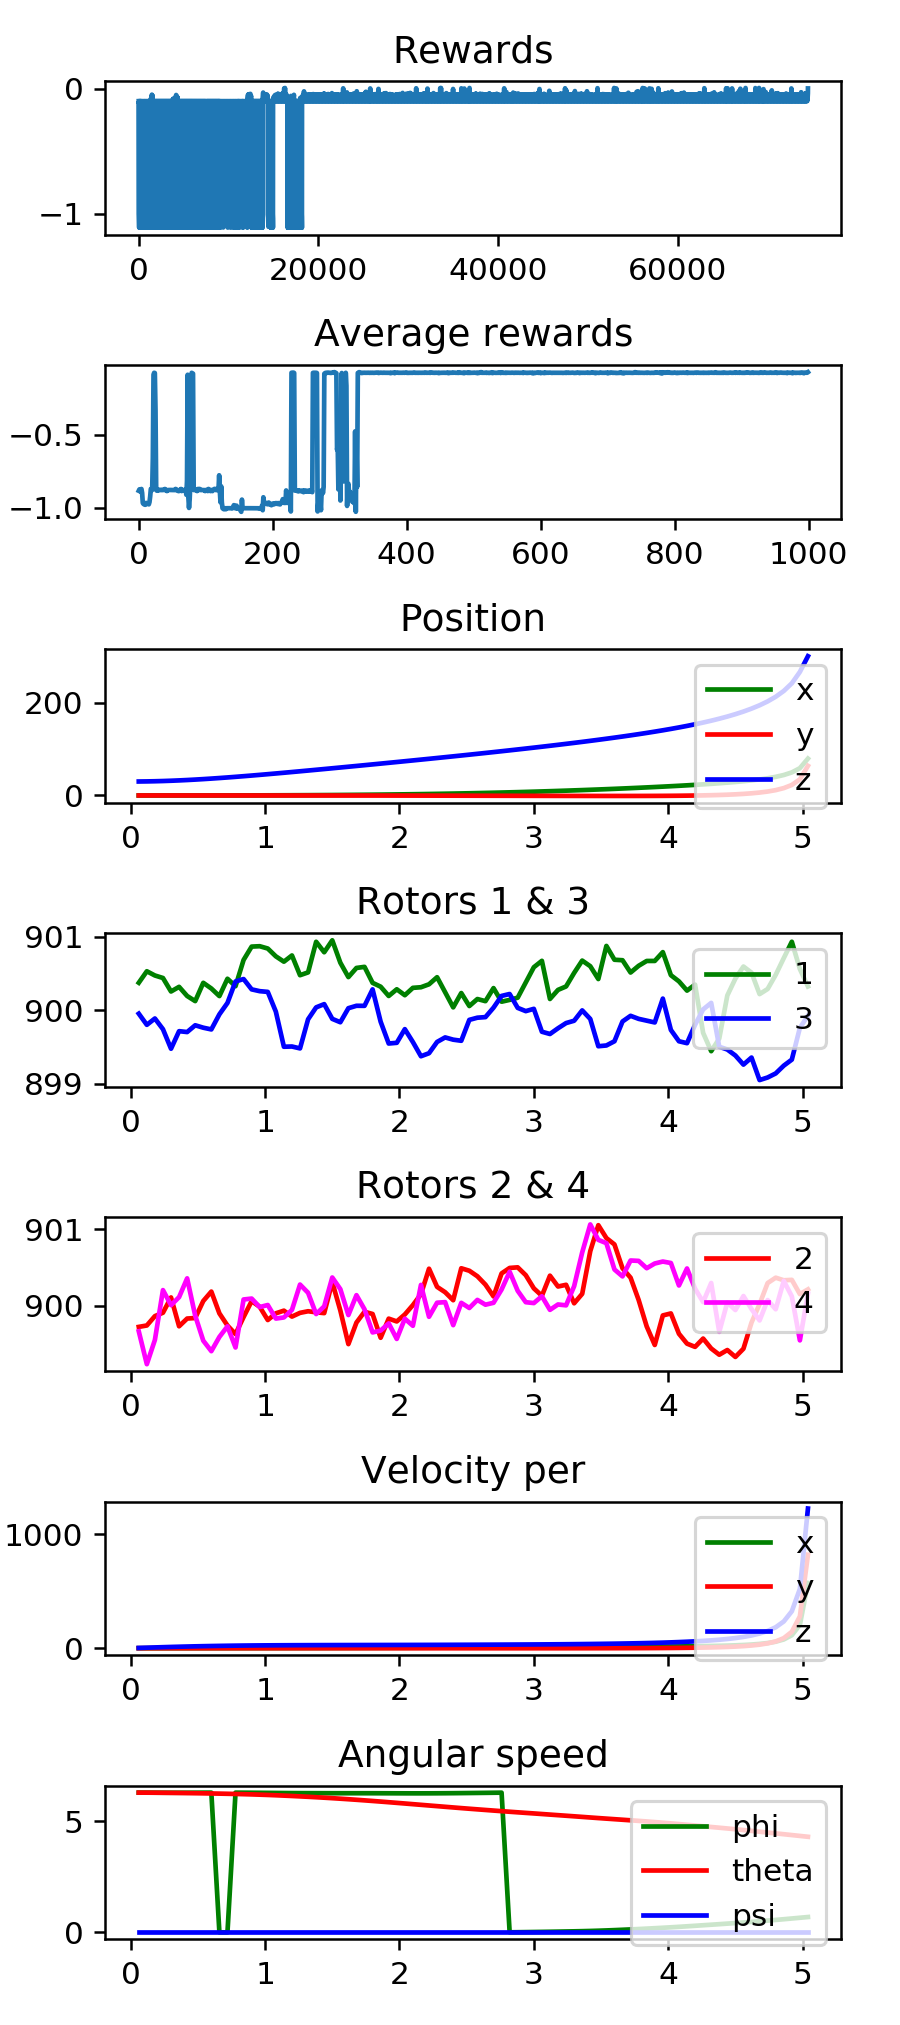

In [23]:
## TODO: Plot the rewards.
%load_ext autoreload
%autoreload 2

from monitor import Monitor


import matplotlib.pyplot as plt
%matplotlib notebook

monitor = Monitor(labels, labels_per_episode)
plt.rcParams['figure.dpi'] = 150

monitor.plot(results, episode_results, per_episode)
    


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
I specified a takeoff task where drone starts from 0,0,30 and goes vertically as far high as possible. In the ideal case it would just go up on the z-axis.

Reward function was the hardest thing to design, and something that has largest impact on
the time needed to train the drone.
As a design choice I decided to not use the rotor speeds in the reward, since I wanted the drone to be rewarded on what it achieves, instead of how it achieves it. I've also didn't used inverse reinforcement learning since though this task is simple and optimal agent could be created easily, I would prefer the agent to find its own solution, and even better surprise me.

I've tried many things. First I've used relative advancement, comparing the previous distance from the current one, the agent learned but quite slowly, I needed at least 1500 episodes and sometimes even more, to learn the task and quite often the learning process failed. I believe that this is due to breaking the Markov property, since reward for same action could be different, as it dependendts not just from the previos state of the drone, but also from the previos distance. And I didn't wanted to even more widen the input state with adding the previous distance.

Afterward I've switched to absolute distance to the target and tried varios exponential rewards. My starting point was to use the ratio of the current distance from the target divided by start distance.
I've exploited the property that exponentiation of ratio smaller then ones is way different the exponentiation of ratio larger then one, such us 0.99^3=0.97 vs 1,01=1,03. 
The problem that quite often happened was that sometimes the negative reward were way too big so the agent started to just drop down to zero to avoid being punished and end the episode as quickly possibly. This kind of experiences filled the buffer and led the agent to wrong path.

Finally I've switched to simple reward structure where agent is punished in full for going in wrong direction, but punishment is proportional multiple of 0.1 if the drone closes on the target.

This made the agent solve the task but it usually got stuck on using just a two rotors in full, while the other two were at 0.

My final tweak was to add small reward for speed that could be achieved if agent uses all 4 rotors. This broke the lock and agent started to quickly learn the optimum strategy.

The main problem in designing the reward function is that rewards should not be too big, nor too small in order for agent to learn. There must be just enough gradient which should be passed to the agent.

Another rule of thumb is that I should fiercely punish and reward moderately.


**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?


- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?


- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.


             
**Answer**:
I've used the recommended DDPG, and I quite like the algorithm. I also have a quite a few ideas how to use it in my line of work for predicting prices, age and gender. Since DDPG is able to accept continous variables as inputs and spew out continous outputs makes practical tool for real world problems. Many of the other algorithms work with discrete inputs & outputs, which might work in theory or for discretized problems. But many interesthing real world problems are continous.
On the other hand I feel that I've only scratched the surface, of mastering the algorith. There are many ideas to try on other problems.

I've tried several choice for the hyperparameters but I don't think that was giving me much value for my efforts, so I stick pretty much with the defaults, since it was reward function that was making all the drastic difference.


exploration_mu=0., 
exploration_theta=0.15, 
exploration_sigma=0.2,
gamma=0.99, 
tau=0.01

I've did some experimentation with the buffer parameters and read a paper that suggest smaller buffer sizes to achieve faster convergence. In my case smaller buffer size sometime helped, but results were mixed so I stick with the default one. Batch size of 64 & 128 trained fastest, so I sticked with 64, since anything above that and training slowed down to a crawl, at least on my machine.

buffer_size=100000
batch_size = 64,

I've used same hidden layers architecture on the both actor and critic
with 3 hidden layers with 32 neurons each, relu activation, dropout of 0.5, and batch normalization.  I've tried leaky relu but results weren't much better the relu and I didn't wanted to tweak another parameter. Since in general agent needs several hundreds episodes to learn and that takes time.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
The problem was that agents got stuck in local optimum of using only two of the rotors. Sometimes it worked fine, due to the initial value of the weights, but more often then not it converged into this suboptimal solution. My final tweak to the reward function solved this issue. And it learned quite fast around 500 episodes to get close to optimal policy.


It's more of an aha moment, but it sometimes cycles back to suboptimal approach. I suppose it's due to the size of the replay buffer. However the latest reward function solved that. Without it the local optimum, of using two rotors only had a large gravity and it was hard to get out of it no matter how many episodes you train.

The performance is good, nearing -6 plus something, and agent achieves around 160 on the z-axis. 

Though it occasionally went below -6 per episode, but I suspect this is due to instability of the physics simulation code. Final chart shows velocity of over 1000, and several times I've spotted z speed of over 2000. This kind of speed made agent climb to the target height of the task of 300, which should be impossible given limited time of the simulation. I've had simigliar experience with physics engines that used naive Euclidean integration. Or it might be some floating points overflow.
Or maybe the agent learned to exploit some quirk in the simulation.


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

Getting started was really hard, reinforcement learning part took me more time then the rest of the specialization togather. In my opinion the reinforcement learning should be a separate specialization. 
After I understood the algorithm, the hardest part was designing the reward function. And without using things that felt like cheating. For example inverse reinforcement learning i.e. adding memories from optimal hand tuned agent, or using agent actions in the reward function. 

The environment required some time to get used to it, like z axis being up, I expected y.  I didn't know why was episode ending, was it because I didn't give the agent enough time, or maybe agent went out of the bounds, or does it bounce off it hits the ground, etc.
I had to read the code, which isn't that complicated but is still one more piece in the puzzle.

I feel like learning so many things, like the principles of reinforcement learning, the suggested algorithm DDPG & finally about the environment is quite a lot in a single go.

The problems is that I could not see anything I could get only look at the charts and logs. 
I would have really loved to see the quadcopter flying, or if this is too diffucult to setup, have another task that displays the visual feedback. Maybe some kind of video game simulation. 
As presented in my final charts the quadcopter sometimes displayed enormous speed, my hunch is on the limitations of the simulation, but it would be cool if the agent found some gotcha about the system and learnd to exploit it.